In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.datasets import make_classification, fetch_mldata
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from scipy.io.arff import loadarff

%matplotlib inline

### Linear SVM

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
))

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVM

In [4]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [6]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
))

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [7]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [8]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Excercises

 Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly the
same model

In [9]:
def plot_classes(X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='red')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='blue')   
    
def plot_separator(clf_, X_):    
    x11 = (-clf_.intercept_ - clf_.coef_[0, 0] * -100)/clf_.coef_[0, 1]
    x12 = (-clf_.intercept_ - clf_.coef_[0, 0] * 100)/clf_.coef_[0, 1]
    
    plt.xlim((X_[:, 0].min()-0.1, X_[:, 0].max()+0.1))
    plt.ylim((X_[:, 1].min()-0.1, X_[:, 1].max()+0.1))
    plt.plot([-100, 100], [x11, x12])

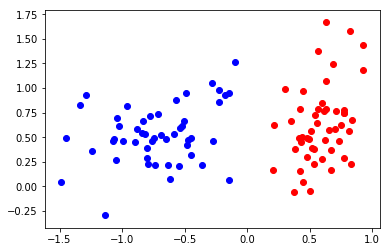

In [10]:
X, y = make_classification(100, 2, 2, 0, 0, n_clusters_per_class=1, flip_y=0, class_sep=0.6, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plot_classes(X, y)
plt.show()

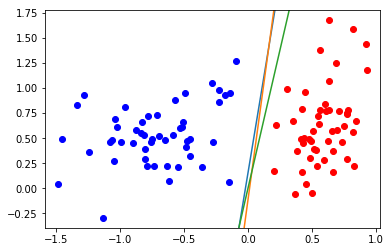

In [11]:
lin_svc = LinearSVC()
lin_svc.fit(X, y)

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, y)

reg_svc = SVC(kernel="linear")
reg_svc.fit(X, y)

plot_classes(X, y)
plot_separator(lin_svc, X)
plot_separator(reg_svc, X)
plot_separator(sgd, X)
plt.show()

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-all to classify all 10 digits

In [12]:
def fetch_mnist():
    # https://www.openml.org/data/download/52667/mnist_784.arff
    data, meta = loadarff('datasets/mnist_784.arff')
    data = data.view([('pixels', '<f8', 784), ('class', '<S1')])
    return data['pixels'], data['class']

X, y = fetch_mnist()
y = y.astype('int16')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_tune, y_tune = X_train[:4000], y_train[:4000]

In [18]:
svc_lin_multi = LinearSVC(multi_class='ovr', random_state=42) #, C=0.1, tol=0.0001
params = {'tol':[0.0001, 0.00001], 'C':[0.1, 0.01]}

gs = GridSearchCV(svc_lin_multi, param_grid=params, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
gs.fit(X_tune, y_tune)
print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.3s finished


0.80825
{'C': 0.1, 'tol': 0.0001}


Train an SVM regressor on the California housing dataset:
<br>
see 02-housing.ipynb "Exercises"